# Environment

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import seaborn as sns

## State vs Pollution

In [6]:
df3 = pd.read_csv("Pollutant and State.csv")
print(df3)

          state        city                               station  Unnamed: 3  \
0         Bihar       Arrah          New DM Office, Arrah - BSPCB         NaN   
1         Bihar  Aurangabad      Gurdeo Nagar, Aurangabad - BSPCB         NaN   
2         Bihar   Begusarai        Lohiyanagar, Begusarai - BSPCB         NaN   
3         Bihar     Bettiah      Kamalnath Nagar, Bettiah - BSPCB         NaN   
4         Bihar     Bettiah      Kamalnath Nagar, Bettiah - BSPCB         NaN   
...         ...         ...                                   ...         ...   
2015  Rajasthan     Jodhpur  Samrat Ashok Udhyan, Jodhpur - RSPCB         NaN   
2016  Rajasthan     Jodhpur  Samrat Ashok Udhyan, Jodhpur - RSPCB         NaN   
2017  Rajasthan     Jodhpur  Samrat Ashok Udhyan, Jodhpur - RSPCB         NaN   
2018  Rajasthan     Jodhpur  Samrat Ashok Udhyan, Jodhpur - RSPCB         NaN   
2019  Rajasthan     Karauli      Satyawati Vihar, Karauli - RSPCB         NaN   

       latitude  longitude 

In [11]:
df3.shape

(2020, 10)

In [21]:
print(len(df3))

2020


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          2020 non-null   object 
 1   city           2020 non-null   object 
 2   station        2020 non-null   object 
 3   Unnamed: 3     0 non-null      float64
 4   latitude       2020 non-null   float64
 5   longitude      2020 non-null   float64
 6   pollutant_id   2020 non-null   object 
 7   pollutant_min  2020 non-null   int64  
 8   pollutant_max  2020 non-null   int64  
 9   pollutant_avg  2020 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 157.9+ KB


In [13]:
df3.describe()

,Unnamed: 3,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,0.0,2020.000000,2020.000000,2020.000000,2020.00000,2020.000000
mean,NaN,22.545418,78.383797,25.645050,95.54901,55.205941
std,NaN,5.205512,4.952354,27.320693,101.47075,56.374483
min,NaN,8.514909,70.909168,1.000000,1.00000,1.000000
25%,NaN,19.108610,74.961696,5.000000,22.00000,14.000000
50%,NaN,23.142888,77.158545,15.000000,64.50000,36.000000
75%,NaN,26.479689,80.699436,37.250000,126.00000,78.000000
max,NaN,34.066206,94.636574,199.000000,500.00000,291.000000


In [23]:
df3.head(10)

,state,city,station,Unnamed: 3,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Bihar,Arrah,"New DM Office, Arrah - BSPCB",NaN,25.562610,84.663264,SO2,8,10,9
1,Bihar,Aurangabad,"Gurdeo Nagar, Aurangabad - BSPCB",NaN,24.757460,84.366208,NO2,2,3,2
2,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",NaN,25.427420,86.138861,NO2,32,117,68
3,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",NaN,26.803650,84.519540,NH3,4,6,5
4,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",NaN,26.803650,84.519540,OZONE,22,28,27
5,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",NaN,25.251013,86.989001,SO2,40,69,55
6,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",NaN,26.108870,91.589544,CO,8,54,20
7,Assam,Guwahati,"Pan Bazaar, Guwahati - PCBA",NaN,26.187500,91.744194,SO2,26,52,37
8,Assam,Nagaon,"Christianpatty, Nagaon - PCBA",NaN,26.349082,92.684490,PM10,25,163,83
9,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",NaN,26.446912,91.439057,PM10,97,500,261


In [25]:
print(df3.dtypes)

state             object
city              object
station           object
Unnamed: 3       float64
latitude         float64
longitude        float64
pollutant_id      object
pollutant_min      int64
pollutant_max      int64
pollutant_avg      int64
dtype: object


### Consider State, Pollutant_ID and Pollutant_Avg

In [15]:
df3['state']

0           Bihar
1           Bihar
2           Bihar
3           Bihar
4           Bihar
          ...    
2015    Rajasthan
2016    Rajasthan
2017    Rajasthan
2018    Rajasthan
2019    Rajasthan
Name: state, Length: 2020, dtype: object

In [30]:
df3['state'].nunique()

23

In [32]:
df3['state'].isnull().sum()

0

In [34]:
df3['pollutant_id'].isnull().sum()

0

In [36]:
df3['pollutant_avg'].isnull().sum()

0

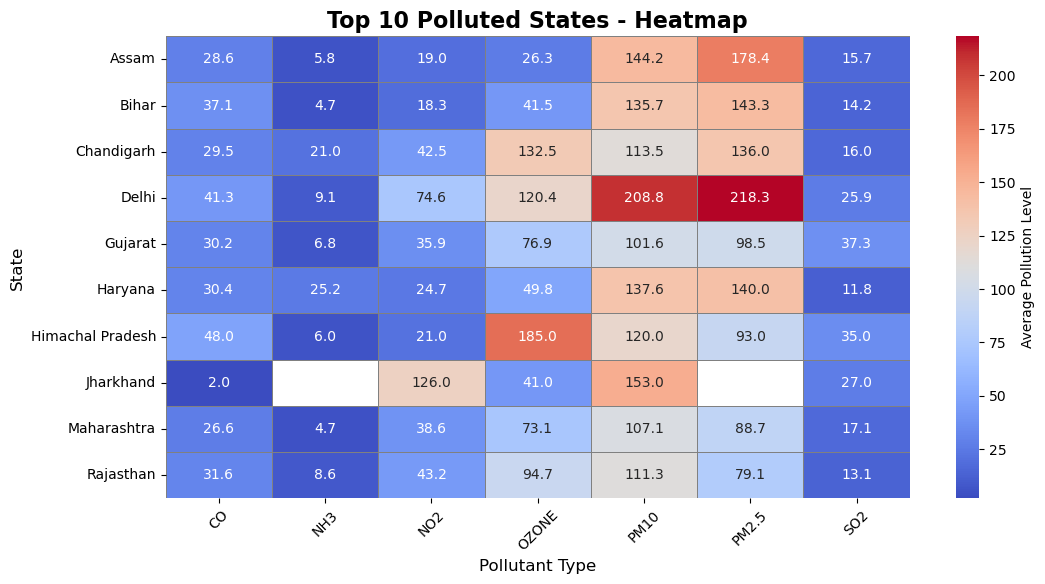

In [38]:
# For the top 10 states with highest average pollution levels
# .index only takes the state names in top_10_states
top_10_states = df3.groupby("state")["pollutant_avg"].mean().nlargest(10).index

# Filter data for only the top 10 states
filtered_data = df3[df3["state"].isin(top_10_states)]

# Pivot is basically reshaping a table for us 
heatmap_data_filtered = filtered_data.pivot_table(index="state", columns="pollutant_id", values="pollutant_avg")

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_filtered, 
            cmap="coolwarm", 
            # annot basically show value of pollutant level
            annot=True, 
            fmt=".1f", 
            linewidths=0.5, 
            linecolor='gray', 
            # cbar_kws is basically adding color bar for the range.
            cbar_kws={'label': 'Average Pollution Level'})

plt.title("Top 10 Polluted States - Heatmap", fontsize=16, fontweight="bold")
plt.xlabel("Pollutant Type", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## Annual Temperature

In [42]:
df4  = pd.read_csv("Annual Temperature.csv")
print(df4)

       YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0    1901.0   25.42    20.11    27.64    28.16     23.1
1    1902.0   25.42    20.88    27.96    27.98    22.51
2    1903.0   25.01    19.99    27.02       28    22.33
3    1904.0   24.93    19.76    27.23    27.57    22.56
4    1905.0   24.84    18.36    26.38     28.2    23.13
..      ...     ...      ...      ...      ...      ...
118  2019.0   25.86    20.71       28     28.6    23.49
119  2020.0   25.78    20.79    27.58    28.45    23.75
120  2021.0   25.93    21.43    27.97    28.36    23.66
121     NaN     NaN      NaN      NaN      NaN      NaN
122     NaN  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC

[123 rows x 6 columns]


In [44]:
df4.shape

(123, 6)

In [46]:
print(len(df4))

123


In [48]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     121 non-null    float64
 1   ANNUAL   122 non-null    object 
 2   JAN-FEB  122 non-null    object 
 3   MAR-MAY  122 non-null    object 
 4   JUN-SEP  122 non-null    object 
 5   OCT-DEC  122 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.9+ KB


In [50]:
df4.describe()

,YEAR
count,121.000000
mean,1961.000000
std,35.073732
min,1901.000000
25%,1931.000000
50%,1961.000000
75%,1991.000000
max,2021.000000


In [52]:
df4.head(10)

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13
5,1906.0,25.18,19.75,27.39,27.78,23.11
6,1907.0,25.02,20.51,26.53,27.74,22.88
7,1908.0,25,20.12,27.53,27.65,22.21
8,1909.0,24.96,20.08,27.14,27.32,22.9
9,1910.0,24.84,20.24,27.29,27.44,22.01


### Consider Year and Annual

In [70]:
df4['YEAR'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
118    False
119    False
120    False
121     True
122     True
Name: YEAR, Length: 123, dtype: bool

In [72]:
df4['YEAR'].isnull().sum()

2

In [84]:
df_temp_cleaned = df4.dropna()

In [78]:
df_temp_cleaned['YEAR'].isnull().sum()

0

In [88]:
df_temp_cleaned['ANNUAL'].isnull().sum()

0

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] IntSlider(end=50, name='Rolling Window Size', start=1, value=10)
    [3] ParamFunction(function, _pane=Matplotlib, defer_load=False)
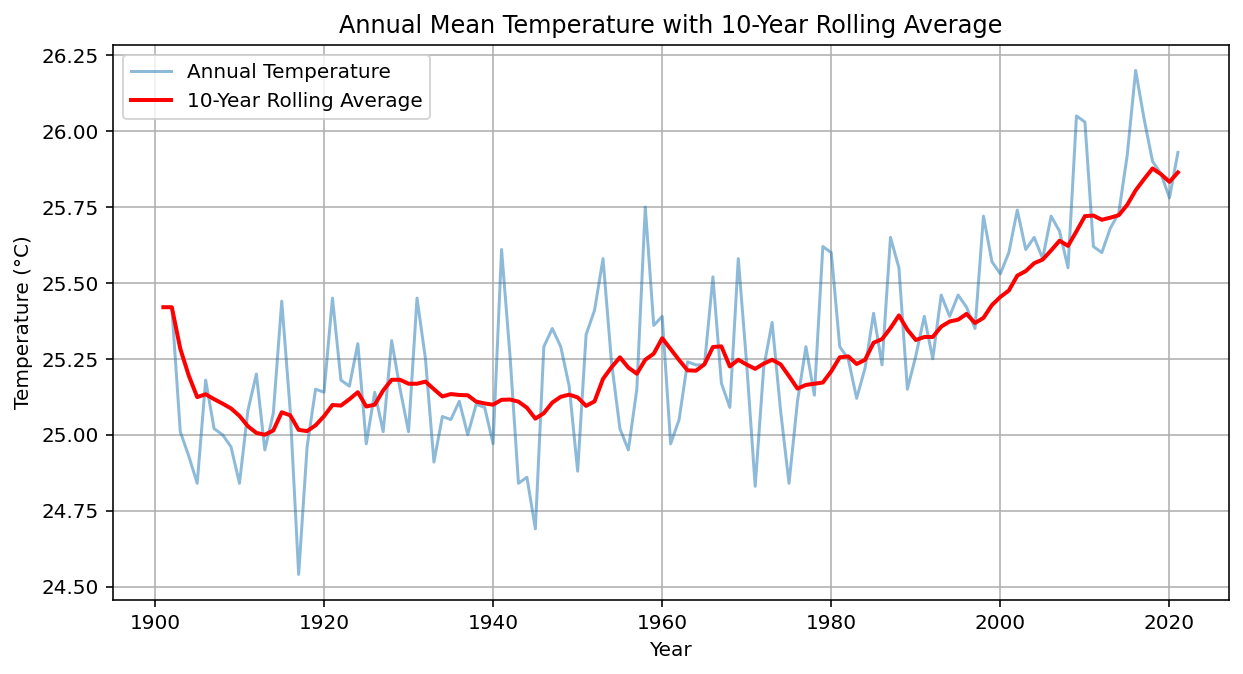

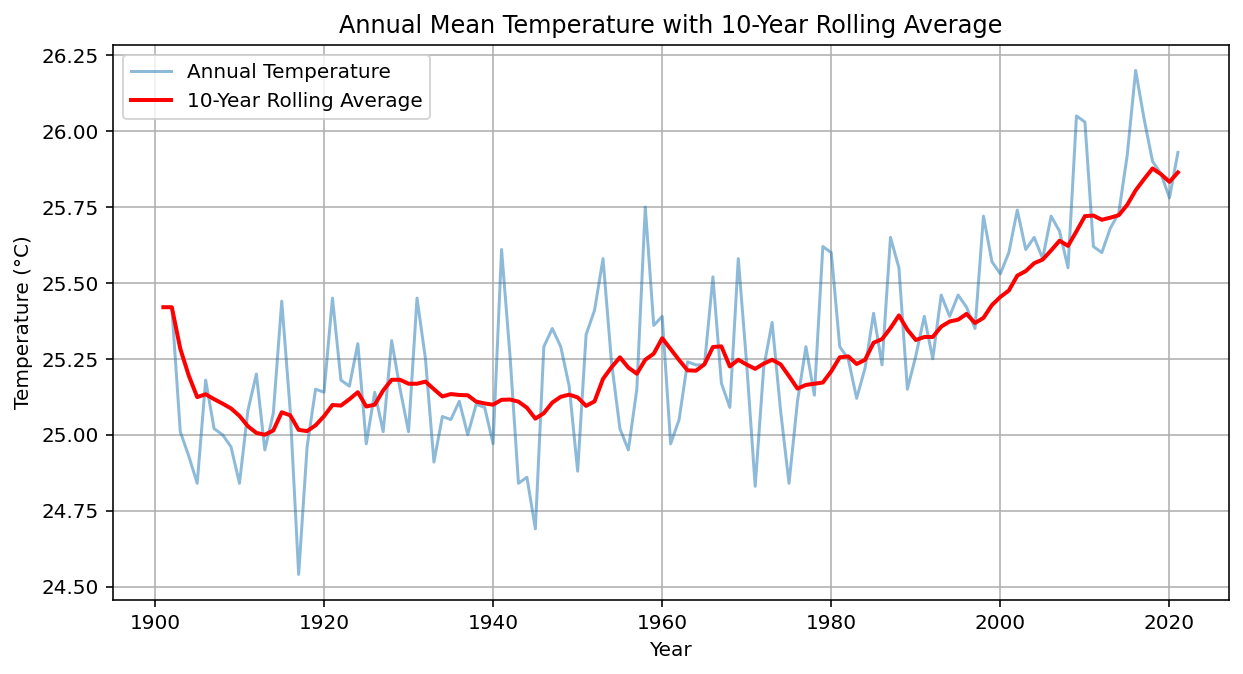

In [92]:
# Enable Panel extension
pn.extension()

# Converts ANNUAL to numeric type and incase if there is non numeric then replace it by coerce which is nan
df_temp_cleaned.loc[:, "ANNUAL"] = pd.to_numeric(df_temp_cleaned["ANNUAL"], errors="coerce")
# now removing all the nan values from the dataset
df_temp_cleaned = df_temp_cleaned.dropna() 

# Define a function to update the plot based on rolling window size
def plot_rolling_avg(window_size):
    # in rolling map  window=window_size defines the number of year for averaging and min_period says that it should be minimum 1
    # mean takes the mean of the year's ANNUAL we have 
    df_temp_cleaned.loc[:, "Rolling_Avg"] = df_temp_cleaned["ANNUAL"].rolling(window=window_size, min_periods=1).mean()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df_temp_cleaned["YEAR"], df_temp_cleaned["ANNUAL"], label="Annual Temperature", alpha=0.5)
    plt.plot(df_temp_cleaned["YEAR"], df_temp_cleaned["Rolling_Avg"], label=f"{window_size}-Year Rolling Average", color="red", linewidth=2)
    
    # Labels & Title
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.title(f"Annual Mean Temperature with {window_size}-Year Rolling Average")
    plt.legend()
    plt.grid(True)
    
    return pn.pane.Matplotlib(plt.gcf(), tight=True)

# Create a Panel slider widget by default 10
window_slider = pn.widgets.IntSlider(name="Rolling Window Size", start=1, end=50, step=1, value=10)

# Create an interactive panel
interactive_plot = pn.bind(plot_rolling_avg, window_slider)

# Layout the dashboard
dashboard = pn.Column(
    "# Interactive Rolling Average Plot",
    "Adjust the rolling window size using the slider below:",
    window_slider,
    interactive_plot
)

# Show the dashboard
dashboard.servable()
